<a href="https://colab.research.google.com/github/Nautyy9/Face_Mask/blob/main/first_self.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf### models
import numpy as np### math computations
import seaborn as sns### visualizations
import matplotlib.pyplot as plt### plotting bar chart
import datetime
import pathlib
import io
from datetime import datetime
import json
import xml.etree.ElementTree as ET
import os
import shutil
import cv2
import time
import random
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape, LeakyReLU)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers import L2, L1
from tensorflow.keras.initializers import RandomNormal

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d andrewmvd/face-mask-detection

face-mask-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip  "/content/face-mask-detection.zip" -d "/content/Dataset/"

Archive:  /content/face-mask-detection.zip
replace /content/Dataset/annotations/maksssksksss0.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Creating dir


In [ ]:

# img_dir = "/content/Dataset/images"
# ann_dir = "/content/Dataset/annotations"


# train_ratio=0.8
# val_ratio=0.1
# test_ratio=0.1


# img_data = os.listdir(img_dir)
# ann_data = os.listdir(ann_dir)
# # print(img_data, ann_data)

# train_dir = os.path.join(img_dir, "train")
# val_dir = os.path.join(img_dir, "val")
# test_dir = os.path.join(img_dir, "test")

# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)


# num_images= len(img_data)

# train_img_data = img_data[:int(train_ratio * num_images)]
# val_img_data = img_data[int(train_ratio * num_images):int((train_ratio + val_ratio) * num_images)]
# test_img_data = img_data[int((train_ratio + val_ratio) * num_images):]

# # train_img_data, val_img_data = train_test_split(img_data , test_size=val_ratio)
# # train_img_data , test_img_data = train_test_split(train_img_data, test_size = test_ratio/(1-train_ratio))


# for filename in train_img_data:
#     src_path = os.path.join(img_dir, filename)
#     dst_path = os.path.join(train_dir, filename)
#     shutil.copy(src_path, dst_path)

# for filename in val_img_data:
#     src_path = os.path.join(img_dir, filename)
#     dst_path = os.path.join(val_dir, filename)
#     shutil.copy(src_path, dst_path)
# # for i, data in enumerate(img_data):
# for filename in test_img_data:
#     src_path = os.path.join(img_dir, filename)
#     dst_path = os.path.join(test_dir, filename)
#     shutil.copy(src_path, dst_path)

# for filename in img_data:
#   file_path = os.path.join(img_dir, filename)
#   os.remove(file_path)


In [ ]:
# train_dir = os.path.join(ann_dir, "train")
# val_dir = os.path.join(ann_dir, "val")
# test_dir = os.path.join(ann_dir, "test")

# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# num_ann= len(ann_data)

# train_ann_data = ann_data[:int(train_ratio * num_ann)]
# val_ann_data = ann_data[int(train_ratio * num_ann):int((train_ratio + val_ratio) * num_ann)]
# test_ann_data = ann_data[int((train_ratio + val_ratio) * num_ann):]

# # train_ann_data, val_ann_data = train_test_split(ann_data , test_size=val_ratio)
# # train_ann_data , test_ann_data = train_test_split(train_ann_data, test_size = test_ratio/(1-train_ratio))




# for filename in train_ann_data:
#     src_path = os.path.join(ann_dir, filename)
#     dst_path = os.path.join(train_dir, filename)
#     shutil.copy(src_path, dst_path)

# for filename in val_ann_data:
#     src_path = os.path.join(ann_dir, filename)
#     dst_path = os.path.join(val_dir, filename)
#     shutil.copy(src_path, dst_path)
# # for i, data in enumerate(ann_data):
# for filename in test_ann_data:
#     src_path = os.path.join(ann_dir, filename)
#     dst_path = os.path.join(test_dir, filename)
#     shutil.copy(src_path, dst_path)

# for filename in ann_data:
#   file_path = os.path.join(ann_dir, filename)
#   os.remove(file_path)


# Preparing Dataset

In [ ]:
!mkdir /content/Dataset/val_images/
!mkdir /content/Dataset/val_annotations/

mkdir: cannot create directory ‘/content/Dataset/val_images/’: File exists
mkdir: cannot create directory ‘/content/Dataset/val_annotations/’: File exists


In [ ]:
train_images = '/content/Dataset/images/'
train_annotations = '/content/Dataset/annotations/'

val_images = '/content/Dataset/val_images/'
val_annotations = '/content/Dataset/val_annotations/'


In [ ]:
val_list = ["maksssksksss715.png","maksssksksss588.png","maksssksksss45.png","maksssksksss566.png","maksssksksss195.png",
            "maksssksksss301.png","maksssksksss350.png","maksssksksss591.png","maksssksksss468.png","maksssksksss624.png",
            "maksssksksss275.png","maksssksksss561.png","maksssksksss671.png","maksssksksss665.png","maksssksksss667.png",
            "maksssksksss499.png","maksssksksss390.png","maksssksksss197.png","maksssksksss599.png","maksssksksss44.png",
            "maksssksksss398.png","maksssksksss413.png","maksssksksss349.png","maksssksksss242.png","maksssksksss832.png",
            "maksssksksss336.png","maksssksksss519.png","maksssksksss691.png","maksssksksss725.png","maksssksksss80.png",
            "maksssksksss359.png","maksssksksss663.png","maksssksksss659.png","maksssksksss754.png","maksssksksss325.png",
            "maksssksksss626.png","maksssksksss246.png","maksssksksss452.png","maksssksksss511.png","maksssksksss179.png",
            "maksssksksss30.png","maksssksksss655.png","maksssksksss745.png","maksssksksss788.png","maksssksksss680.png",
            "maksssksksss84.png","maksssksksss411.png","maksssksksss87.png","maksssksksss331.png","maksssksksss343.png","maksssksksss168.png",]
# print(len(val_list))

In [ ]:
# here name is the name of image specified in the list , to which we want to remove .png and add .xml hence we end up same file in val_images and val_annotations
for name in val_list:
  # moving xml files
  shutil.move(train_annotations+name[:-3]+"xml", val_annotations+name[:-3]+"xml")

FileNotFoundError: ignored

In [ ]:
# moving png files to val_images
for name in val_list:
  shutil.move(train_images+name, val_images+name)

### Config List

In [ ]:
class_names = ["without_mask", "with_mask", "mask_weared_incorrect"]

config  = {
    "lr" : 10e-3,
    'epochs': 60,
    "batch_size": 32,
    "im_size": 256,
    "regularization_rate": 0.0,
    "filters": 6,
    "kernel_size" : 3,
    "strides": 1,
    "pool_size": 2,
    "dense_1" : 64,
    "dense_2": 128,
    # PATCH IS FOR TRANSFORMERS
    "patch_size" : 16,
    # projected size to which we convert our images to , means the number of dimensions to which we want to convert our image within transformer layer and then we also revert back to original dimension say 256
    'proj_dim': 768 ,
    "classes": 3,
    # B=bounding box
    "B": 2,
    "H": 224,
    "W": 224,
    "split_size" : 224//32,
}
NUM_FILTERS=512
OUTPUT_DIM=config["classes"]+5*config["B"]

In [ ]:
im_paths = []
xml_paths = []

val_im_paths =[]
val_xml_paths = []


# pri0nt(val_images, val_annotations)
# print(train_images, train_annotations)


for i in os.listdir(train_annotations):
  im_paths.append(train_images+i[:-3]+'png')
  xml_paths.append(train_annotations+i)

for i in os.listdir(val_annotations):
  val_im_paths.append(val_images+i[:-3]+"png")
  val_xml_paths.append(val_annotations + i)

# print(len(im_paths),len(xml_paths))
# print(len(val_im_paths),len(val_xml_paths))

In [ ]:
# creating dataset from python list
train_dataset = tf.data.Dataset.from_tensor_slices((im_paths, xml_paths))
val_dataset = tf.data.Dataset.from_tensor_slices((val_im_paths, val_xml_paths))


In [ ]:
# for i in val_dataset.take(1):
  # print(i)
# print(list(train_dataset.take(1).as_numpy_iterator()))
# train_dataset

In [ ]:
# print(list(val_dataset.take(1).as_numpy_iterator()))
# val_dataset

In [ ]:

# t =  os.listdir(train_images)

# for images in t:
#   print(f"{images}")

# Processing XML

In [ ]:
import xml.etree.ElementTree as ET
def process_xml(filename):
  tree = ET.parse(filename)
  root = tree.getroot()
  # root ke andar 5 tag (folder, filename, size, segmented, object--> iske andar bounding box)
  size = root.find('size')
  # aur size ke andar 3 tag (h,w,depth)
  height = float(size.find('height').text)
  width = float(size.find('width').text)

  bounding_boxes = []
  for roots in root.findall("object"):
    for bnd_bx in roots.iter('bndbox'):
        xmin = (float(bnd_bx.find("xmin").text))
        ymin = (float(bnd_bx.find("ymin").text))
        xmax = (float(bnd_bx.find("xmax").text))
        ymax = (float(bnd_bx.find("ymax").text))
        break
    name = roots.find("name").text
    class_dict={class_names[i]:i for i in range(len(class_names))}
    # print(lass_dict)
    x_center = (xmin+xmax)/(2.0*width)
    y_center = (ymin + ymax)/(2.0*height)
    box_w = (xmax-xmin)/width
    box_h = (ymax-ymin)/height

    bounding_box = [x_center , y_center , box_w, box_h, class_dict[name]]
    bounding_box = tf.constant(bounding_box, tf.float32)
    bounding_box =  tf.where((bounding_box < 1.0), bounding_box , tf.constant(1.0))

    bounding_boxes.append(bounding_box)
  return tf.convert_to_tensor(bounding_boxes)

  # for child in root:
    # print(child.tag, "i", child.attrib ,"j", child.text)


In [ ]:
process_xml('/content/Dataset/annotations/maksssksksss207.xml')

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[0.10625   , 0.35580525, 0.0425    , 0.05992509, 1.        ],
       [0.4725    , 0.43258426, 0.11      , 0.1835206 , 1.        ],
       [0.74625   , 0.411985  , 0.0875    , 0.11235955, 1.        ],
       [0.93375   , 0.48314607, 0.1325    , 0.31460676, 1.        ]],
      dtype=float32)>

In [ ]:
def generate_output(bounding_boxes):
  # here we are getting each patch , with width and height as 256//32 = 7 (for 7X7 patch size)   where we say 32 is size of each pathc and  prediction(lambda*(center_w, center_h, w, h) = 5 + 3 classes) 5+3 =8 CLASSES  where 3 is for output class and 5 default

  output_label = np.zeros((config["split_size"], config["split_size"], config["classes"]+5))

  # to get point for each patch we've to multiply with 7 for width and 7 for height then we do mudulo of 1 to get the exact position of point in a patch
  for b in range(len(bounding_boxes)):
    grid_x = bounding_boxes[...,b, 0]*config["split_size"]
    grid_y = bounding_boxes[...,b, 1]*config["split_size"]
    # print("grid_x", grid_x%1,"grid_y", grid_y%1)

    # integer value of i and j will make them according to thier row and column numbers
    i = int(grid_x)
    j = int(grid_y)

    # print(output_label.shape)
    # print(i,j)
    output_label[i,j,0:5] = [1., grid_x%1, grid_y%1, bounding_boxes[...,b,2], bounding_boxes[..., b, 3]]
    output_label[i,j,5+int(bounding_boxes[...,b,4])] = 1.
  return tf.convert_to_tensor(output_label, tf.float32)


In [ ]:
generate_output(process_xml('/content/Dataset/annotations/maksssksksss824.xml'))

<tf.Tensor: shape=(7, 7, 8), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [1.        , 0.09625   , 0.264045  , 0.0225    , 0.06367041,
         0.        , 1.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.    

In [ ]:
def get_bboxes(im_path, xml_path):
  img = tf.io.decode_png(tf.io.read_file(im_path), channels=3)
  img = tf.cast(tf.image.resize(img, [config['H'],config['W']]), dtype=tf.float32)

  # numpy_function will vectorize the function. This means that it will apply the function to all elements of an array, rather than just one element at a time.
  # Given a python function func wrap this function as an operation in a TensorFlow function. func must take numpy arrays as its arguments and return numpy arrays as its outputs.
  bboxes = tf.numpy_function(func=process_xml , inp=[xml_path], Tout=tf.float32)

  return img, bboxes

In [ ]:
train_dataset=train_dataset.map(get_bboxes)
val_dataset=val_dataset.map(get_bboxes)

In [ ]:
for i,j in train_dataset.skip(2):
  print(i.shape,j)
  break

(224, 224, 3) tf.Tensor(
[[0.045      0.32022473 0.06       0.08614232 1.        ]
 [0.0525     0.46629214 0.065      0.08614232 1.        ]
 [0.1575     0.3764045  0.085      0.15355805 1.        ]
 [0.25       0.39700374 0.05       0.08239701 1.        ]
 [0.50875    0.1835206  0.0725     0.11985019 1.        ]
 [0.8275     0.32771537 0.105      0.16853933 1.        ]
 [0.91125    0.45318353 0.0475     0.08239701 1.        ]
 [0.70625    0.45131087 0.0525     0.06367041 1.        ]
 [0.7625     0.43632957 0.035      0.05617978 1.        ]
 [0.255      0.30524343 0.05       0.07116105 1.        ]
 [0.93125    0.37265918 0.0375     0.05617978 1.        ]
 [0.9475     0.4812734  0.03       0.06367041 1.        ]
 [0.55875    0.25468165 0.0325     0.08988764 1.        ]], shape=(13, 5), dtype=float32)


In [ ]:
cv2.imwrite('out_1.png', np.array(i))

True

# Augementation/Albumentations


In [ ]:
transforms = A.Compose([
    A.Resize(config["H"],config["W"]),
    A.RandomScale(scale_limit=0.1, interpolation=cv2.INTER_LANCZOS4,p=0.5),
    A.HorizontalFlip(p=0.5,),
    A.Resize(config["H"],config["W"]),

], bbox_params=A.BboxParams(format='yolo',))

In [ ]:
def aug_albument(image,bboxes):
  # bboxes =  tf.constant(bboxes)
  # bboxes =  tf.where((bboxes > 1.0), tf.constant , bboxes)

  augmented=transforms(image=image,bboxes=bboxes)
  print(augmented)
  print(augmented["bboxes"].shape)
  return [tf.convert_to_tensor(augmented["image"],dtype=tf.float32),
          tf.convert_to_tensor(augmented["bboxes"],dtype=tf.float32)]

In [ ]:
def process_data(image,bboxes):

    aug= tf.numpy_function(func=aug_albument, inp=[image,bboxes], Tout=(tf.float32,tf.float32))
    return aug[0],aug[1]
  # since our aug_albument fucntion returns array of 2 o/p from  transform function

In [ ]:
train_dataset = train_dataset.map(process_data)

In [ ]:
for i, j in train_dataset.take(2):
  print(i.shape, j)
  break

{'image': array([[[141.41083 , 128.61897 , 108.0148  ],
        [142.97937 , 129.59117 , 109.749176],
        [143.06303 , 128.08583 , 108.15965 ],
        ...,
        [111.48604 , 115.31034 , 110.360405],
        [ 40.167267,  42.129463,  37.14767 ],
        [ 14.853423,  14.868576,  15.658821]],

       [[142.51797 , 129.5225  , 108.550316],
        [141.62842 , 128.22777 , 107.462975],
        [146.38371 , 130.54689 , 111.41146 ],
        ...,
        [107.846954, 111.65408 , 106.675026],
        [ 37.338192,  38.5593  ,  33.56301 ],
        [ 14.476626,  14.489441,  15.286765]],

       [[140.40125 , 127.408516, 107.33442 ],
        [140.8397  , 127.44468 , 106.679695],
        [142.91595 , 127.8778  , 108.75883 ],
        ...,
        [112.34857 , 116.22038 , 110.41123 ],
        [ 36.726307,  38.66229 ,  33.66386 ],
        [ 14.327266,  14.340966,  15.683819]],

       ...,

       [[ 19.755632,  20.760298,  24.1562  ],
        [ 24.534328,  26.268034,  29.495789],
        [ 26

UnknownError: ignored

In [ ]:
cv2.imwrite("out_2.png", np.array(i))

In [ ]:
def preprocess_augment(img,y):
  img = tf.image.random_brightness(img, max_delta=50.)
  img = tf.image.random_saturation(img, lower=0.5, upper=1.5)
  img = tf.image.random_contrast(img, lower=0.5, upper=1.5)
  #img = tf.image.random_hue(img, max_delta=0.5 )
  img = tf.clip_by_value(img, 0, 255)
  labels=tf.numpy_function(func=generate_output, inp=[y], Tout=(tf.float32))
  return img,labels

In [ ]:
def preprocess(img,y):
  img = tf.cast(tf.image.resize(img, size=[config["H"], config["W"]]), dtype=tf.float32)
  labels=tf.numpy_function(func=generate_output, inp=[y], Tout=(tf.float32))
  return img,labels

In [ ]:
train_dataset = train_dataset.map(preprocess_augment)
val_dataset = val_dataset.map(preprocess)
# since we want augementation for only train dataset not val/testing dataset

In [ ]:
train_dataset = (
    train_dataset
    .batch(config["batch_size"])
    .prefetch(tf.data.AUTOTUNE)
)
val_dataset = (
    val_dataset
    .batch(config["batch_size"])
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
for i, j in  train_dataset.take(1):
  print(i.shape, j)
  break

In [ ]:
# hehe =  tf.constant([[0.20625,    0.30666667, 0.0875,     0.14,       1.        ],
#  [0.35875,    0.24833333 , 0.0475  ,   0.09     ,  0.        ],
#  [0.4525  ,   0.17166667 ,0.065    ,  0.11      , 0.        ],
#  [0.93625 ,   0.21166667 ,0.0575   ,  0.07666667, 1.        ],
#  [0.86625 ,   0.28833333 ,0.0525   ,  0.05666667, 1.        ],], dtype=tf.float32, shape=(5,5))

# for i , val in enumerate(hehe[..., 2]):
#   if(val>0.08):
#     value = tf.Variable(hehe[...,2][i])
#     value.assign(1.0)


# print(hehe)


In [ ]:
bounding_box = tf.constant([-0.1, 0.8, 0.5, 1.0002], dtype=tf.float32)
normie =[]
def put_value_in_range(bounding_box):
  updated_bounding_box = tf.where((bounding_box < 1.0 ),
                                  bounding_box,
                                  tf.constant(1.0))

  # updated_bounding_box = tf.where((updated_bounding_box > 0.0 ),
  #                                 bounding_box,
  #                                 tf.constant(0.0))
  return updated_bounding_box

updated_bounding_box = put_value_in_range(bounding_box)
normie = updated_bounding_box
print(normie)

In [ ]:
cv2.imwrite("out_3.png", np.array(i[2]))

In [ ]:
hehe = np.array([(0.2, 0.3, 0.0),
                  (0.3, 0.2, 0.0),
                  (0.4, 0.1, 0.0),
                  (0.9, 0.2, 0.0),
                  (0.8, 0.3, 0.0)])


#Making Model

In [ ]:
base_model = tf.keras.applications.efficientnet.EfficientNetB1(
    include_top = False,
    weights="imagenet",
    input_shape = (config["H"], config["W"], 3)
)
base_model.trainable = False

In [ ]:
model=tf.keras.Sequential([
  base_model,
  #  tf.keras.initializers.he_normal.It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor.
  Conv2D(NUM_FILTERS,(3,3), padding = 'same',kernel_initializer='he_normal',),
  BatchNormalization(),
    # alpha means multiplying negative values with 0.1

  LeakyReLU(alpha=0.1),

  Conv2D(NUM_FILTERS,(3,3),padding = 'same',kernel_initializer='he_normal',),
  BatchNormalization(),
  LeakyReLU(alpha=0.1),

  Conv2D(NUM_FILTERS,(3,3),padding = 'same',kernel_initializer='he_normal',),
  BatchNormalization(),
  LeakyReLU(alpha=0.1),

  Conv2D(NUM_FILTERS,(3,3),padding = 'same',kernel_initializer='he_normal',),
  LeakyReLU(alpha=0.1),

  Flatten(),

  Dense(NUM_FILTERS,kernel_initializer='he_normal',),
  BatchNormalization(),
  LeakyReLU(alpha=0.1),

  Dropout(0.5),

  Dense(config["split_size"]*config["split_size"]*OUTPUT_DIM,activation='sigmoid'),

  Reshape((config["split_size"],config["split_size"],OUTPUT_DIM)),
])
model.summary()


# Compute IOU

In [ ]:
def compute_iou(boxes1, boxes2):
    boxes1_t = tf.stack([boxes1[..., 0] - boxes1[..., 2] / 2.0,
                         boxes1[..., 1] - boxes1[..., 3] / 2.0,
                         boxes1[..., 0] + boxes1[..., 2] / 2.0,
                         boxes1[..., 1] + boxes1[..., 3] / 2.0],
                        axis=-1)

    boxes2_t = tf.stack([boxes2[..., 0] - boxes2[..., 2] / 2.0,
                         boxes2[..., 1] - boxes2[..., 3] / 2.0,
                         boxes2[..., 0] + boxes2[..., 2] / 2.0,
                         boxes2[..., 1] + boxes2[..., 3] / 2.0],
                        axis=-1)
    lu = tf.maximum(boxes1_t[..., :2], boxes2_t[..., :2])
    rd = tf.minimum(boxes1_t[..., 2:], boxes2_t[..., 2:])

    intersection = tf.maximum(0.0, rd - lu)
    inter_square = intersection[..., 0] * intersection[..., 1]

    square1 = boxes1[..., 2] * boxes1[..., 3]
    square2 = boxes2[..., 2] * boxes2[..., 3]

    union_square = tf.maximum(square1 + square2 - inter_square, 1e-10)
    return tf.clip_by_value(inter_square / union_square, 0.0, 1.0)

In [ ]:
def difference(x,y):
  # Computes the sum of elements across dimensions of a tensor.
  return tf.reduce_sum(tf.square(y-x))

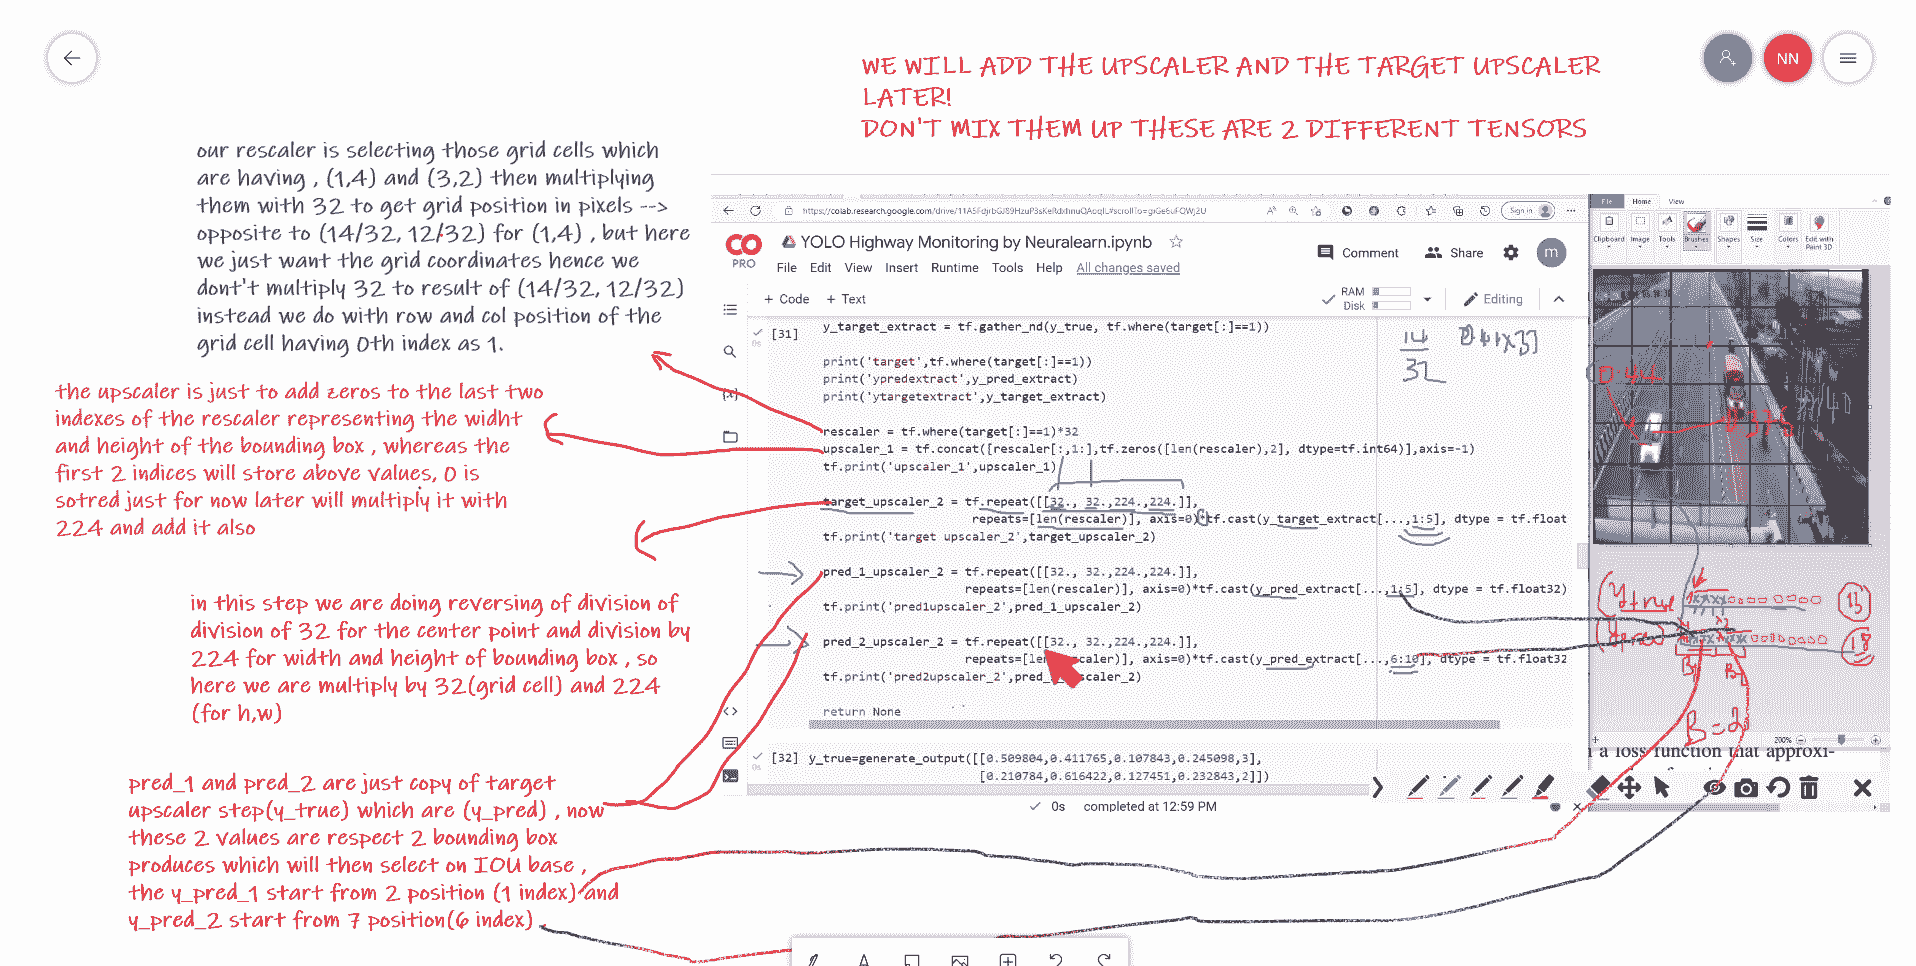

In [ ]:
# our rescaler is fetching the real bounding box first five params and multuplying with 7(because our to get dimension of the patch we've to multiply by patch_size)
# then you can see im concatinating zeros to recaler(original_bb) --> λ(w_center, h_center, width , height) and the zeros having length of the rescaler (making sure the dimension of rescaler matches the zeros dimensions)
#

def yolo_loss(y_true, y_pred):
  target = y_true[...,0]
  ###################### OBject Loss

  # the y_true contains λ(w_center, h_center, width , height)*13 = 13
  # the y_pred contains λ1(w_center, h_center, width , height)*λ2(w_center, h_center, width , height)*13 =18



  # The tf.gather_nd() function in TensorFlow is used to gather elements from a tensor according to a set of indices. The function takes two arguments:
  # The first argument is the tensor from which elements will be gathered.
  # The second argument is a tensor of indices that specifies which elements to gather.
  # The indices tensor can have any shape, but it must be compatible with the shape of the tensor from which elements will be gathered. For example, if the tensor from which elements will be gathered has a shape of (2, 3, 4), then the indices tensor must have a shape of (2, 3).
  y_pred_extract = tf.gather_nd(y_pred, tf.where(target[:]==1))
  y_target_extract = tf.gather_nd(y_true, tf.where(target[:]==1))
  # above we only wanted those patches where our o/p is 1 meaning the object is present
  print("y_pred_extract",y_pred_extract, "y_target_extract", y_target_extract)
  # BACKPROPOGATION

  rescaler = tf.where(target[:]==1)*config["split_size"]
  # making upscaler having the first 5 (λ(w_center, h_center, width , height)) filled from the detected object and rest 13 are filled with 0's
  upscaler_1 = tf.concat([rescaler[:,1:],tf.zeros([len(rescaler),2], dtype=tf.int64)],axis=-1)


  # below we multiply (32,32,224,224) --> backpropagate
  # make sure to notice the dimension of the repeat tensor (1,1,4) ---> [[32,32,224,224]]

  # making for the target/y_true
  target_upscaler_2 = tf.repeat([[float(config["split_size"]),float(config["split_size"]),config["H"],config["W"]]],
                       repeats=[len(rescaler)], axis=0)*tf.cast(y_target_extract[...,1:5], dtype = tf.float32)

  # making for pred/y_pred

  pred_1_upscaler_2 = tf.repeat([[float(config['split_size']),float(config['split_size']),config["H"],config["W"]]],
                      repeats=[len(rescaler)], axis=0)*tf.cast(y_pred_extract[...,1:5], dtype = tf.float32)
  pred_2_upscaler_2 = tf.repeat([[float(config['split_size']),float(config['split_size']),config["H"],config["W"]]],
                      repeats=[len(rescaler)], axis=0)*tf.cast(y_pred_extract[...,6:10], dtype = tf.float32)


  # since our values in upscaler_1 first 5 indicies for y_true is filled λ(w_center, h_center, width , height) and rest are )'s hence we are adding the

  target_orig = tf.cast(upscaler_1, dtype = tf.float32)+target_upscaler_2
  pred_1_orig = tf.cast(upscaler_1, dtype = tf.float32)+pred_1_upscaler_2
  pred_2_orig = tf.cast(upscaler_1, dtype = tf.float32)+pred_2_upscaler_2


  # comparing the iou score of the first_pred with the second and whichever is greater got accepted
  # we've first taken in the pred_2 and then pred_1 for convinence
  mask =tf.cast(tf.math.greater(compute_iou(target_orig,pred_2_orig),
                                compute_iou(target_orig,pred_1_orig)),
                                dtype=tf.int32)
  # concat need scalar tensor i.e, the input tensor to combined must be scalar hence we pass the values to be concatinated in array [] ->Rank-1
  # pred_2_orig has 8 values so the only value where we have 5 values is y_pred_extract
  y_pred_joined=tf.transpose(tf.concat([tf.expand_dims(y_pred_extract[...,0],axis=0),
                        tf.expand_dims(y_pred_extract[...,5],axis=0)],axis=0))


  # above from shape (2,1) to shape (1,2)

  # Stacks a list of rank-R tensors into one rank-(R+1) tensor.
  # now stacking up iterator value from 0 to len(rescaler), mask --> 0 or 1(repr -> false and true) ---> resulting --[(0,1) ,(1,0), (2,0)] --> now rank is 1 so after stacking rank will be 2  so o/p shape of stack ---> (len(rescale), 2)
  # now see we are stacking in colmnwise manner hence the number of rows will always be 2 and columns--> len(rescaler)
  obj_pred = tf.gather_nd(y_pred_joined,tf.stack([tf.range(len(rescaler)),mask],axis=-1))

  object_loss = difference(tf.cast(obj_pred,dtype =tf.float32)
                            ,tf.cast(tf.ones([len(rescaler)]),dtype=tf.float32))

  ######################## --->FOR NO OBJECT
  # getting the all 10 params of of the patches where there is no objecti i.e, our target =0
  y_pred_extract = tf.gather_nd(y_pred[...,0:config["B"]*5], tf.where(target[:]==0))


  y_target_extract = tf.zeros(len(y_pred_extract))

  no_object_loss_1 = difference(tf.cast(y_pred_extract[...,0],dtype =tf.float32)
                            ,tf.cast(y_target_extract,dtype=tf.float32))

  no_object_loss_2 = difference(tf.cast(y_pred_extract[...,5],dtype =tf.float32)
                            ,tf.cast(y_target_extract,dtype=tf.float32))

  no_object_loss = no_object_loss_1+no_object_loss_2

  ######################## For OBject class loss
  y_pred_extract = tf.gather_nd(y_pred[...,10:],tf.where(target[:]==1))
  class_extract = tf.gather_nd(y_true[...,5:],tf.where(target[:]==1))

  class_loss = difference(tf.cast(y_pred_extract,dtype =tf.float32)
                                ,tf.cast(class_extract,dtype=tf.float32))

  ######################### For object bounding box loss
  y_pred_extract = tf.gather_nd(y_pred[...,0:config["B"]*5], tf.where(target[:]==1))
  # taking center points from the prediction
  centre_joined=tf.stack([y_pred_extract[...,1:3],y_pred_extract[...,6:8]],axis=1)

  centre_pred = tf.gather_nd(centre_joined,tf.stack([tf.range(len(rescaler)),mask],axis=-1))
  centre_target = tf.gather_nd(y_true[...,1:3], tf.where(target[:]==1))

  centre_loss = difference(centre_pred,centre_target)

  size_joined=tf.stack([y_pred_extract[...,3:5],y_pred_extract[...,8:10]],axis=1)

  size_pred = tf.gather_nd(size_joined,tf.stack([tf.range(len(rescaler)),mask],axis=-1))
  size_target = tf.gather_nd(y_true[...,3:5], tf.where(target[:]==1))
  print(size_pred, size_target)
  size_loss = difference(tf.math.sqrt(tf.math.abs(size_pred)),tf.math.sqrt(tf.math.abs(size_target)))
  box_loss = centre_loss+size_loss

  lambda_coord = 5.0
  lambda_no_obj = 0.5

  loss = object_loss + (lambda_no_obj*no_object_loss)+ tf.cast(lambda_coord*box_loss,dtype=tf.float32)+ tf.cast(class_loss,dtype=tf.float32)
  return loss

In [ ]:
checkpoint_filepath='/content/drive/MyDrive/Bang/yolo_efficientnet_b1_new.h5'
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

In [ ]:
def scheduler(epoch, lr):
  if epoch < 40:
    return 1e-3
  elif epoch>=40 and epoch<80:
    return 5e-4
  else:
    return 1e-4

In [ ]:
lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
model.compile(
  loss=yolo_loss,
  optimizer=Adam(1e-3),
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  verbose=1,
  epochs=135,
  callbacks = [lr_callback,callback]
)

In [ ]:
x = tf.constant([1, 4])
y = tf.constant([2, 5])
z = tf.constant([3, 6])

tf.stack([x, y, z], axis=0)

In [ ]:
!pip install pylint --upgrade

In [ ]:
!pip install flake8